### Preparing data

In [22]:
import os
import random
import shutil
import pandas as pd
import cv2
import numpy as np
import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras import regularizers
from keras.layers import LeakyReLU, ELU, ReLU
import matplotlib.pyplot as plt

In [19]:
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

In [ ]:
def createFolderIfNotExists(path):
    try:
        os.mkdir(path)
    except FileExistsError:
        #print("Directory data_generated already exists")
        return

In [32]:
DATASET_DIR = "C:\\Users\\ASUS\\Documents\\Proyectos\\pokedex\\pokemon"
numberAnomalies = 0
for category in os.listdir(DATASET_DIR):
    category_path = os.path.join(DataGenerator.DATASET_DIR, category)
    if not os.path.isdir(category_path):
        print("no es directorio valido")
        continue
    images = os.listdir(category_path)
    totalImgs = len(images)
    counter = 0
    path = "data"
    createFolderIfNotExists(path)
    for img in images:
        tempPath = path
        #print(counter / totalImgs)
        if(counter / totalImgs < 0.7):
            tempPath += "\\train"
        elif(counter / totalImgs < 0.85):
            tempPath += "\\test"
        else:
            tempPath += "\\validation"
        createFolderIfNotExists(tempPath)
        tempPath += "\\"+str(category)
        createFolderIfNotExists(tempPath)
        tempPath += "\\"+str(img)
        imgArr = cv2.imread("pokemon\\"+str(category)+"\\"+str(img))
        try:
            cv2.imwrite(tempPath, imgArr) 
        except:
            numberAnomalies += 1
                
        counter += 1
print("numberAnomalies: "+str(numberAnomalies))

numberAnomalies: 33


In [2]:
datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)

In [3]:
train_it = datagen.flow_from_directory('data\\train\\', class_mode='categorical', batch_size=32)
val_it = datagen.flow_from_directory('data\\validation\\', class_mode='categorical', batch_size=32)
test_it = datagen.flow_from_directory('data\\test\\', class_mode='categorical', batch_size=32)

Found 7529 images belonging to 149 classes.
Found 1524 images belonging to 149 classes.
Found 1604 images belonging to 149 classes.


In [9]:
bx,by = train_it.next()
datagen.fit(bx)
#np.shape(np.shape(train_it))

In [33]:
model = Sequential()
model.add(Conv2D(64, (3,3),input_shape=(256, 256, 3)))
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Conv2D(32, (3,3)))
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(149 * 2, activation = 'relu'))
model.add(Dense(149, activation='sigmoid'))
 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 254, 254, 64)      1792      
_________________________________________________________________
re_lu_17 (ReLU)              (None, 254, 254, 64)      0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 125, 125, 32)      18464     
_________________________________________________________________
re_lu_18 (ReLU)              (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 123008)            0         
__________

In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit_generator(train_it, steps_per_epoch=16, validation_data=val_it, validation_steps=8,epochs=50)

Epoch 1/50
16/16 [==============================] - 10s 597ms/step - loss: 5.3626 - acc: 0.0352 - val_loss: 4.9183 - val_acc: 0.0625
Epoch 2/50
16/16 [==============================] - 9s 587ms/step - loss: 4.9196 - acc: 0.0449 - val_loss: 4.8999 - val_acc: 0.0697
Epoch 3/50
16/16 [==============================] - 9s 579ms/step - loss: 4.8664 - acc: 0.0684 - val_loss: 4.8962 - val_acc: 0.0547
Epoch 4/50
16/16 [==============================] - 9s 559ms/step - loss: 4.8680 - acc: 0.0664 - val_loss: 4.7457 - val_acc: 0.0547
Epoch 5/50
16/16 [==============================] - 9s 575ms/step - loss: 4.7652 - acc: 0.0645 - val_loss: 4.6860 - val_acc: 0.0547
Epoch 6/50
16/16 [==============================] - 8s 508ms/step - loss: 4.6940 - acc: 0.0588 - val_loss: 4.7280 - val_acc: 0.0664
Epoch 7/50
16/16 [==============================] - 9s 541ms/step - loss: 4.6395 - acc: 0.0781 - val_loss: 4.6707 - val_acc: 0.0430
Epoch 8/50
16/16 [==============================] - 9s 559ms/step - loss: 4

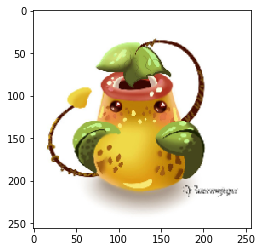

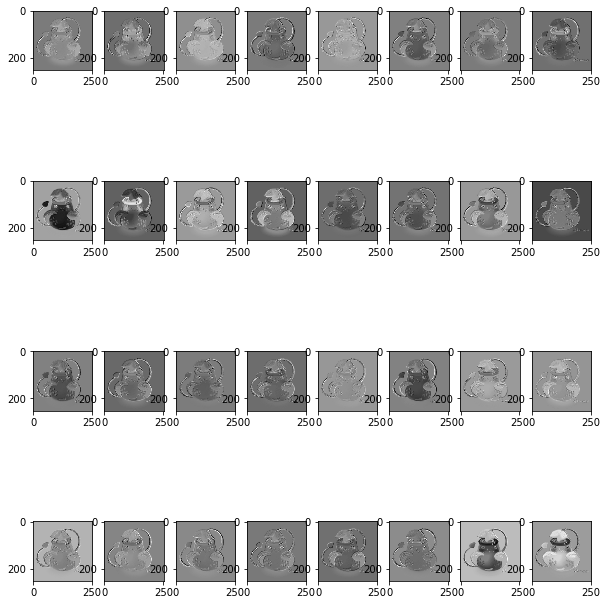

In [20]:
bx,by = train_it.next()
plt.imshow(bx[1])
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
            
activations = activation_model.predict(bx[1].reshape(1,256,256,3))
display_activation(activations, 8, 4, 2)